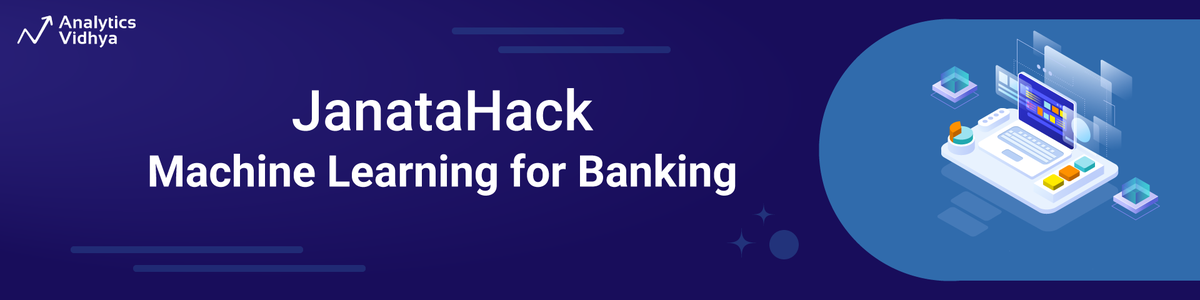

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [2]:
df_train=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack: Machine Learning for Banking/train_fNxu4vz.csv')
df_train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
df_test=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack: Machine Learning for Banking/test_fjtUOL8.csv')
df_test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [5]:
combine=df_train.append(df_test)
combine.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0


In [6]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273850 entries, 0 to 109540
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  273850 non-null  int64  
 1   Loan_Amount_Requested    273850 non-null  object 
 2   Length_Employed          261543 non-null  object 
 3   Home_Owner               231790 non-null  object 
 4   Annual_Income            231850 non-null  float64
 5   Income_Verified          273850 non-null  object 
 6   Purpose_Of_Loan          273850 non-null  object 
 7   Debt_To_Income           273850 non-null  float64
 8   Inquiries_Last_6Mo       273850 non-null  int64  
 9   Months_Since_Deliquency  126612 non-null  float64
 10  Number_Open_Accounts     273850 non-null  int64  
 11  Total_Accounts           273850 non-null  int64  
 12  Gender                   273850 non-null  object 
 13  Interest_Rate            164309 non-null  float64
dtypes: f

In [7]:
combine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,273850.0,1.013693e+07,79053.829946,10000001.0,10068463.25,10136925.50,10205387.75,10273850.00
Annual_Income,231850.0,7.339279e+04,58529.835485,3000.0,45000.00,63000.00,89000.00,7500000.00
Debt_To_Income,273850.0,1.721590e+01,7.845967,0.0,11.36,16.85,22.78,39.99
Inquiries_Last_6Mo,273850.0,7.845426e-01,1.036816,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,126612.0,3.410339e+01,21.750307,0.0,16.00,31.00,49.00,180.00
Number_Open_Accounts,273850.0,1.118603e+01,4.973663,0.0,8.00,10.00,14.00,84.00
Total_Accounts,273850.0,2.506798e+01,11.589677,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


#### Finding missing values

In [8]:
combine.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

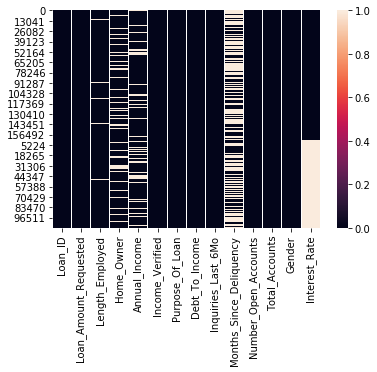

In [9]:
sns.heatmap(combine.isnull())

In [10]:
combine.Length_Employed.value_counts()

10+ years    88328
2 years      24420
3 years      21478
< 1 year     21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [11]:
combine.Length_Employed=combine.Length_Employed.map({'10+ years':10,  
'2 years':2,
'3 years':3 ,
'< 1 year':0,
'5 years':5,
'1 year':1,
'4 years':4,
'7 years':7,
'6 years':6,
'8 years':8,
'9 years':9})

In [12]:
combine.Length_Employed=combine.Length_Employed.fillna(statistics.mode(combine.Length_Employed))

In [13]:
combine.Home_Owner.value_counts()

Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [14]:
combine.Home_Owner=combine.Home_Owner.fillna(statistics.mode(combine.Home_Owner))

In [60]:
combine.Home_Owner=combine.Home_Owner.map({'Mortgage':4,
'Rent':2,
'Own':3,
'Other':1,
'None':0 })

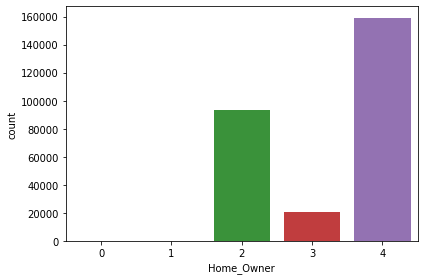

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(combine.Home_Owner)
plt.tight_layout()

In [62]:
combine.Annual_Income=combine.Annual_Income.fillna(combine.Annual_Income.mean())

In [63]:
combine.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,0.0,2,68000.000000,not verified,car,18.37,0,NaN,9,14,Female,1.0
1,10000002,30000.0,4.0,4,73392.793977,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,10000003,24725.0,7.0,4,75566.400000,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0
3,10000004,16000.0,0.0,4,56160.000000,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0
4,10000005,17000.0,8.0,3,96000.000000,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0


In [85]:
#combine['Loan_Amount_Requested'].apply(lambda x : str.replace(',', '').astype(int))

In [65]:
type(combine['Loan_Amount_Requested'])

pandas.core.series.Series

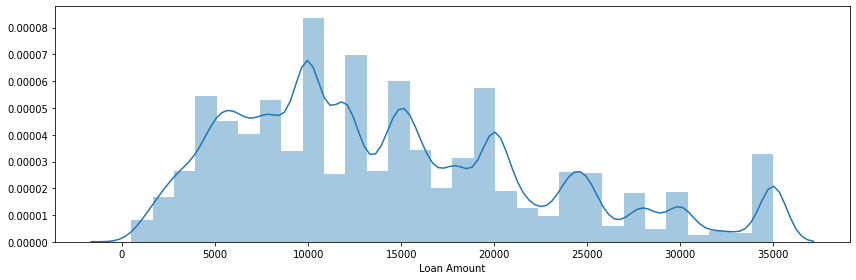

In [182]:
plt.figure(figsize=(12,4))
sns.distplot(combine.Loan_Amount_Requested,bins=30)
plt.xlabel('Loan Amount')
plt.tight_layout()

In [67]:
combine.Inquiries_Last_6Mo.value_counts()

0    142486
1     76791
2     34006
3     14829
4      3779
5      1363
6       556
7        30
8        10
Name: Inquiries_Last_6Mo, dtype: int64

In [87]:
combine.Income_Verified.value_counts()

VERIFIED - income           99076
VERIFIED - income source    88253
not verified                86521
Name: Income_Verified, dtype: int64

In [88]:
combine.Income_Verified=encoder.fit_transform(combine.Income_Verified)

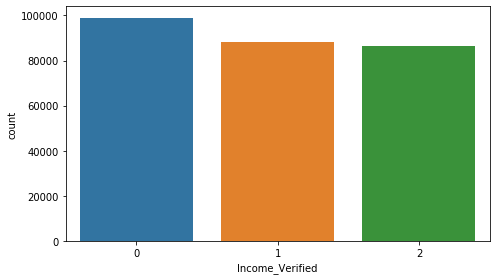

In [89]:
plt.figure(figsize=(7,4))
sns.countplot(combine.Income_Verified)
plt.tight_layout()

In [69]:
combine.Purpose_Of_Loan.value_counts()

debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

In [90]:
combine.Purpose_Of_Loan=encoder.fit_transform(combine.Purpose_Of_Loan)

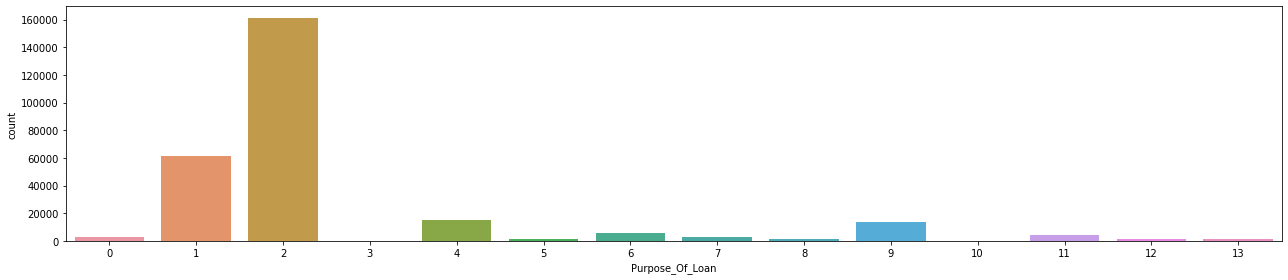

In [91]:
plt.figure(figsize=(18,4))
sns.countplot(combine.Purpose_Of_Loan)
plt.tight_layout()

In [71]:
combine.Inquiries_Last_6Mo.value_counts()

0    142486
1     76791
2     34006
3     14829
4      3779
5      1363
6       556
7        30
8        10
Name: Inquiries_Last_6Mo, dtype: int64

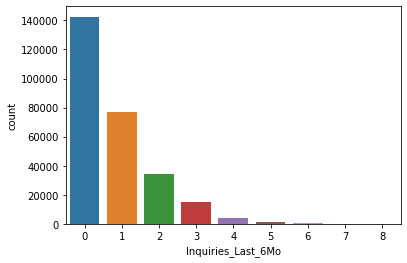

In [72]:
sns.countplot(combine.Inquiries_Last_6Mo)

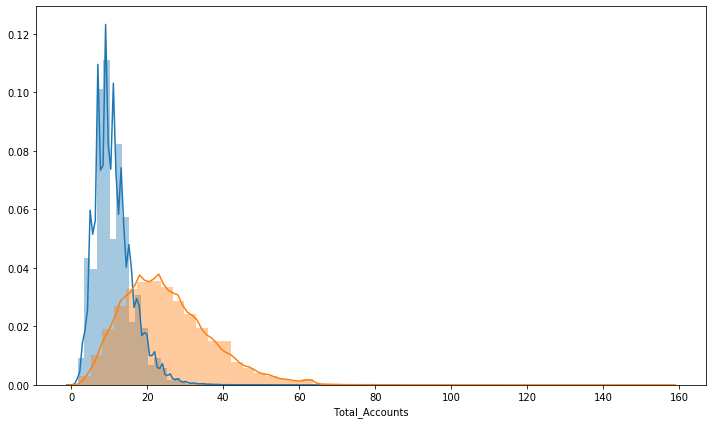

In [92]:
plt.figure(figsize=(10,6))
sns.distplot(combine.Number_Open_Accounts)
sns.distplot(combine.Total_Accounts)
plt.tight_layout()

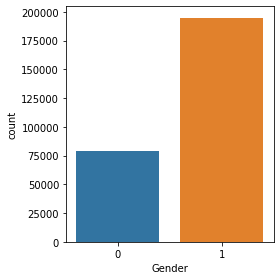

In [94]:
plt.figure(figsize=(4,4))
sns.countplot(combine.Gender)
plt.tight_layout()

In [93]:
combine.Gender=encoder.fit_transform(combine.Gender)

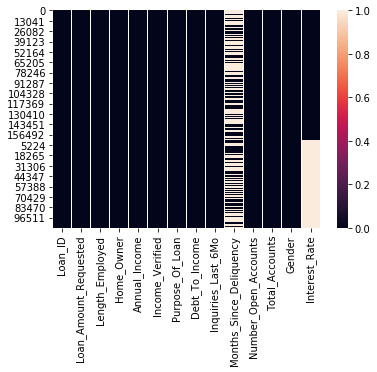

In [75]:
sns.heatmap(combine.isnull())

In [95]:
x= combine[combine['Interest_Rate'].isnull()!=True].drop(['Interest_Rate'], axis=1)
y = combine[combine['Interest_Rate'].isnull()!=True]['Interest_Rate']

In [96]:
X_test = combine[combine['Interest_Rate'].isnull()==True].drop(['Interest_Rate'], axis=1)
X_test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500.0,10.0,4,129000.0,0,2,12.87,0,68.0,10,37,1
1,10164311,26000.0,10.0,4,110000.0,2,1,11.37,0,NaN,6,23,1
2,10164312,6075.0,0.0,2,75000.0,0,2,6.83,2,NaN,5,20,1
3,10164313,12000.0,10.0,4,73000.0,1,2,7.76,0,NaN,6,8,1
4,10164314,35000.0,0.0,4,156000.0,2,2,9.62,0,26.0,9,21,1


In [97]:
X_test.shape

(109541, 13)

In [98]:
x.shape,y.shape

((164309, 13), (164309,))

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [100]:
cat_features = list(range(0, x.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [317]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=500,depth=6,learning_rate=0.129999,loss_function=None,verbose=True,)

In [318]:
categorical_features_indices = np.where(x.dtypes != np.float)[0]

In [319]:
cat.fit(x_train, y_train,
          eval_set=(x_test, y_test),
         plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0739121	test: 1.0742347	best: 1.0742347 (0)	total: 113ms	remaining: 56.6s
1:	learn: 1.0551529	test: 1.0556296	best: 1.0556296 (1)	total: 215ms	remaining: 53.6s
2:	learn: 1.0401527	test: 1.0405136	best: 1.0405136 (2)	total: 307ms	remaining: 50.8s
3:	learn: 1.0258432	test: 1.0263612	best: 1.0263612 (3)	total: 416ms	remaining: 51.5s
4:	learn: 1.0148887	test: 1.0156210	best: 1.0156210 (4)	total: 516ms	remaining: 51.1s
5:	learn: 1.0057938	test: 1.0065308	best: 1.0065308 (5)	total: 614ms	remaining: 50.6s
6:	learn: 0.9978277	test: 0.9985135	best: 0.9985135 (6)	total: 726ms	remaining: 51.1s
7:	learn: 0.9914528	test: 0.9923336	best: 0.9923336 (7)	total: 829ms	remaining: 51s
8:	learn: 0.9859895	test: 0.9869041	best: 0.9869041 (8)	total: 935ms	remaining: 51s
9:	learn: 0.9812644	test: 0.9823871	best: 0.9823871 (9)	total: 1.04s	remaining: 50.8s
10:	learn: 0.9762857	test: 0.9773944	best: 0.9773944 (10)	total: 1.14s	remaining: 50.7s
11:	learn: 0.9721976	test: 0.9733759	best: 0.9733759 (11

KeyboardInterrupt: 

In [ ]:
predict_train = cat.predict(x_train)
print('\nTarget on train data',predict_train)

In [ ]:
from sklearn.metrics import accuracy_score
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

In [ ]:

# predict the target on the test dataset
predict_test = cat.predict(x_test)
print('\nTarget on test data',predict_test)

In [ ]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

In [ ]:
final_prediction=cat.predict(X_test)
print('\nTarget on train data',final_prediction)

In [ ]:
submission = pd.DataFrame()

In [313]:
submission['Loan_ID'] = df_test['Loan_ID']

In [314]:
submission['Interest_Rate'] = cat.predict(X_test)

In [315]:
submission.to_csv("/home/kumar/Desktop/Submission6.csv",index=False)

In [316]:
submission.head()

,Loan_ID,Interest_Rate
0,10164310,2.0
1,10164311,1.0
2,10164312,2.0
3,10164313,2.0
4,10164314,2.0


#### Public Leader Board
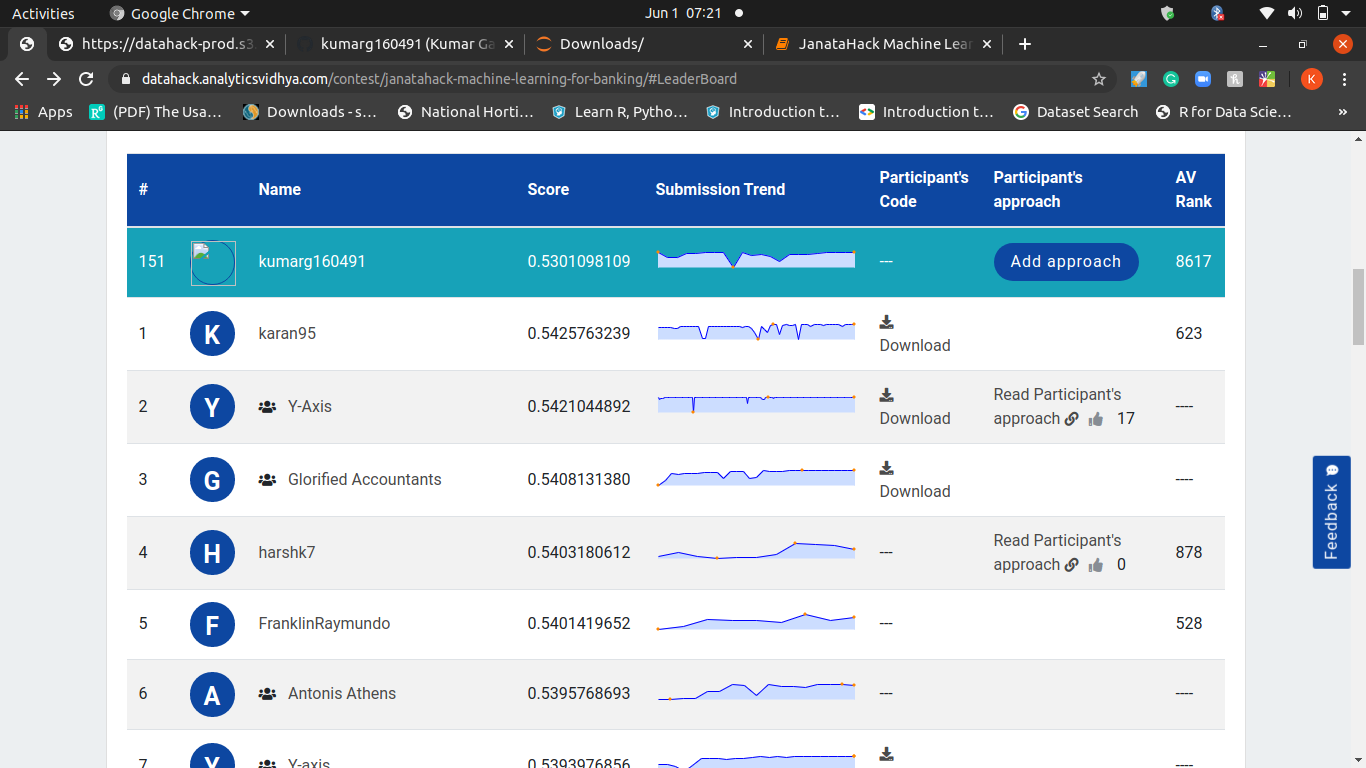

#### Private Leader Board
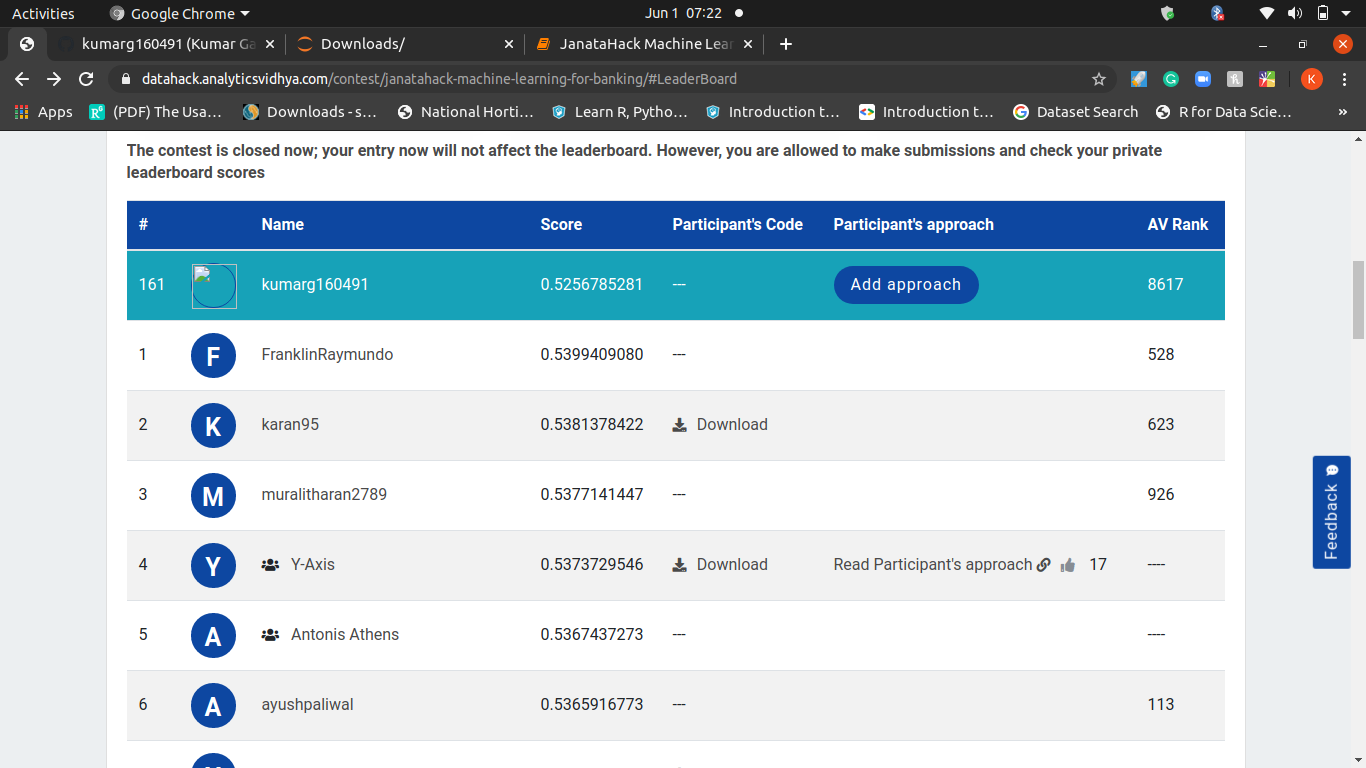